# ***Regression***

In [3]:
# Importing required libraries
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline 

In [4]:
# Load Data sets , both train and test
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# **Explore the data sets**

In [5]:
# Get dim of data sets
print("Shape of Train Data : ", train_data.shape)
print("Shape of Test Data : ", test_data.shape)

Shape of Train Data :  (12980, 12)
Shape of Test Data :  (4399, 11)


In [6]:
# Columns 
print('Columns name of train data set : \n',train_data.columns)

print('\nColumns name of test data set : \n',test_data.columns)

Columns name of train data set : 
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Columns name of test data set : 
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')


**Count** is our traget varibale as we want to forcast hourly demand of bikes.

In [7]:
# First 5 values in train data set
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [8]:
# First 5 values in test data set
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [9]:
# statistical summary of our train data set
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [10]:
# data types of columns
train_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
train_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Columns: 12 entries, datetime to count
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [12]:
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Columns: 11 entries, datetime to registered
dtypes: float64(4), int64(6), object(1)
memory usage: 378.2+ KB


Let's look at the distribution of our target variable *count*.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


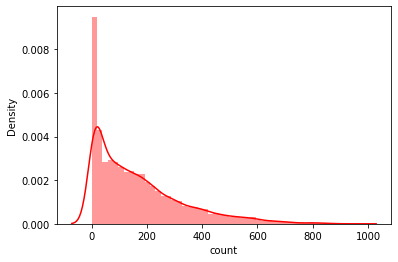

In [13]:
# use distribution plot 
sns.distplot(train_data['count'], hist = True, kde = True, color = 'red')

It is clear from the distribution plot that our data is right skewed as its tail is on right side or peak is on left side.

We can deal with right skewed data using several  ways. We will take log of our variable and see if it becomes normal or not.

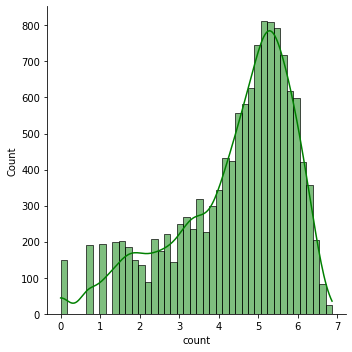

In [14]:
sns.displot(np.log(train_data['count']),kde = True, color='green')

Now our data is less skewed compare to without log.

Let's explore our variables to better understand our data.

In [15]:
train_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

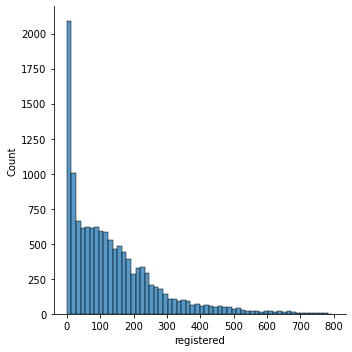

In [16]:
# explore distribution of registerd 
sns.displot(train_data['registered'])

(array([5467., 3231., 2034., 1057.,  483.,  321.,  199.,   97.,   70.,
          21.]),
 array([  0. ,  79.6, 159.2, 238.8, 318.4, 398. , 477.6, 557.2, 636.8,
        716.4, 796. ]),
 <a list of 10 Patch objects>)

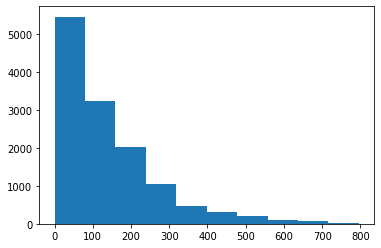

In [17]:
plt.hist(train_data['registered'])

We can see that most of the registered rentals lies in the range of 0 to 200. The registered users at a particular time step will always be less than or equal to the demand (count) of that particular timestep.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


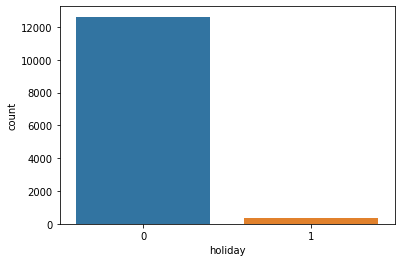

In [18]:
sns.countplot(train_data['holiday'])

In [19]:
train_data['holiday'].value_counts().to_frame()

,holiday
0,12623
1,357


Most days are non holiday (almost 12623).

Now we want to know how our variables are related to each others.We will see correlation b/w them to check their relationships.For better understanding of correlation we will use heatmap.

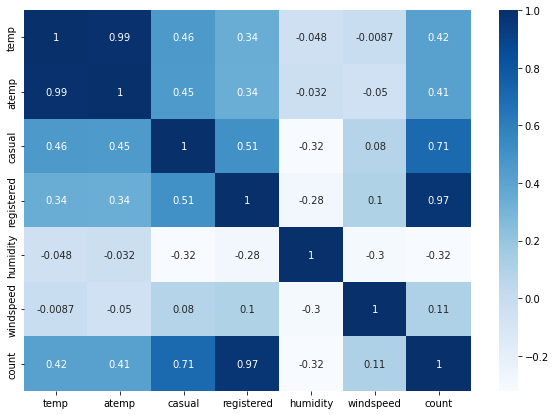

In [20]:
# looking at the correlation between numerical variables
corr = train_data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()

fig,ax= plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(corr,annot=True, cmap="Blues")

Some of the inferences from the above correlation map are:

1. temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".

2. Windspeed will not be really useful numerical feature and it is visible from it correlation value with "count"

3. Since "atemp" and "temp" has got strong correlation with each other, during model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

4. Casual and Registerd are highly corelated and both have positive correlation with count.

In [21]:
# Check for missing values
train_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [22]:
test_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

There are no missing values in the test dataset as well. We can now move further and build our first model. Before that let's first extract some new features using the datetime variable. We can extract the date, hour, month.

In [23]:
from datetime import datetime
from datetime import date

In [24]:
# extracting date, hour and month from the datetime
train_data["date"] = train_data.datetime.apply(lambda x : x.split()[0])
train_data["hour"] = train_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
train_data["month"] = train_data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [25]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,2011-01-01,4,1


Now we will build a linear regression model to get the predictions on the test data. So we have to make the similar changes in test data as we have done for the training data.

In [26]:
test_data["date"] = test_data.datetime.apply(lambda x : x.split()[0])
test_data["hour"] = test_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
test_data["month"] = test_data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [27]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2012-06-30,1,6
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2012-06-30,2,6
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2012-06-30,3,6
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2012-06-30,4,6
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2012-06-30,5,6


Now our data is ready. Before making the model, we will create a validation set to validate our model. So, we will divide the train set into training and validation set. We will train the model on the training set and check its performance on the validation set. Since the data is time based, we will split it as per time. Let's take first 15 months for training and remaining 3 months in the validation set.

In [28]:
# create training and validation sets
training = train_data[train_data['datetime']<='2012-03-30 0:00:00']
validation = train_data[train_data['datetime']>'2012-03-30 0:00:00']



*   We will drop the datetime, date variable as we have already extracted features from these variables.
* We will also drop the atemp variable as we saw that it is highly 
correlated with the temp variable.



In [29]:
train = train_data.drop(['datetime','date', 'atemp'],axis=1)
test = test_data.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

# **Model Building**
## **Linear Regression Model**

In [30]:
# Import linear regression object
from sklearn.linear_model import LinearRegression

In [31]:
# Create Linear Regression object 
lr = LinearRegression()

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [32]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

We will remove the target variable from both the training and validation set and keep it in a separate variable. We saw in the visualization part that the target variable is right skewed, so we will take its log as well before feeding it to the model.

In [33]:
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

In [34]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [35]:
# fitting the model on X_train and y_train
lr.fit(X_train,y_train)

LinearRegression()

Now we have a trained linear regression model with us. We will now make prediction on the X_val set and check the performance of our model. Since the evaluation metric for this problem is RMSLE, we will define a model which will return the RMSLE score.

In [36]:
# making prediction on validation set
prediction = lr.predict(X_val)

In [37]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [38]:
# rmsle for prediction
rmsle(y_val,prediction)

0.8875379204281815

In [51]:
test_prediction = lr.predict(test)

We got a rmsle value of 0.8875 on the validation set.

Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
# defining a decision tree model with a depth of 5.
dt_reg = DecisionTreeRegressor(max_depth=5)

In [42]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

Its time to make prediction on the validation set using the trained decision tree model.

In [43]:
predict = dt_reg.predict(X_val)

In [44]:
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.17102267399446966

The rmsle value has decreased to 0.171. This is a decent score.

 Let's now make predictions for the test dataset.

In [45]:
test_prediction = dt_reg.predict(test)

These are the log values and we have to convert them back to the original scale.

In [46]:
final_prediction = np.exp(test_prediction)

In [47]:
# First Five Predictions 
final_prediction[0:5]

array([67.33749501, 67.33749501, 22.21848887, 14.51841185,  8.65276338])

In [48]:
submission = pd.DataFrame()

In [49]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [50]:
submission.to_csv('submission.csv', header=True, index=False)

# **Conclusion**

We got the score of 0.16. Which is good enough.